# Step 1: Install dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Data Exploring

## 2.1: Movie data

In [2]:
df_anime = pd.read_csv("dataset/anime.csv")

In [3]:
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
# find movie amount
df_anime.nunique()

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64

In [6]:
# movie genres data
genre_set = set()
df_anime_genres = df_anime["genre"].fillna("")
for genre in df_anime_genres:
  genre_list = genre.split(", ")
  for g in genre_list:
    genre_set.add(g)

genre_set.remove("")

print("genre amount: ", len(genre_set))
print("genre types: ", genre_set)
print("movie with no 'genre': ", (df_anime_genres=="").sum())

genre amount:  43
genre types:  {'Hentai', 'Yaoi', 'Shounen', 'Parody', 'Space', 'Harem', 'Sports', 'Dementia', 'Comedy', 'Shoujo Ai', 'Shoujo', 'Historical', 'Military', 'Super Power', 'Fantasy', 'Horror', 'Magic', 'Police', 'Psychological', 'Romance', 'Mystery', 'Yuri', 'Josei', 'Samurai', 'Seinen', 'Thriller', 'Action', 'Ecchi', 'School', 'Supernatural', 'Vampire', 'Sci-Fi', 'Slice of Life', 'Mecha', 'Demons', 'Shounen Ai', 'Game', 'Kids', 'Drama', 'Music', 'Cars', 'Martial Arts', 'Adventure'}
movie with no 'genre':  62


In [7]:
# movie type data
type_set = set()
df_anime_types = df_anime["type"].fillna("")
for anime_type in df_anime_types:
  type_set.add(anime_type)

type_set.remove("")

print("movie amount: ", len(type_set))
print("movie types: ", type_set)
print("movie with no 'type' : ", (df_anime_types=="").sum())

movie amount:  6
movie types:  {'ONA', 'Movie', 'Music', 'TV', 'Special', 'OVA'}
movie with no 'type' :  25


## 2.2: Rating data

In [8]:
df_rating = pd.read_csv("dataset/rating.csv")

In [10]:
df_rating.head()

,user_id,anime_id,rating
0,1,20.0,-1.0
1,1,24.0,-1.0
2,1,79.0,-1.0
3,1,226.0,-1.0
4,1,241.0,-1.0


In [11]:
# find user amount
df_rating.nunique()

user_id     8655
anime_id    8288
rating        11
dtype: int64

## 2.3: Data Visualization

In [13]:
# filter-out NaN data
df_rating_2 = df_rating[df_rating["rating"]!=-1]

In [14]:
# count each rating values
no_user_voted = df_rating_2.groupby('anime_id')['rating'].agg('count')
no_movies_voted = df_rating_2.groupby('user_id')['rating'].agg('count')

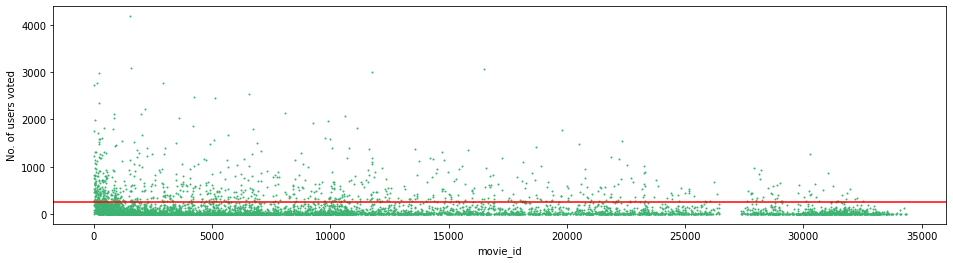

In [15]:
# qualified movie_id with more than X rating count
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen', s=1)
plt.axhline(y=250,color='r')
plt.xlabel('movie_id')
plt.ylabel('No. of users voted')
plt.show()

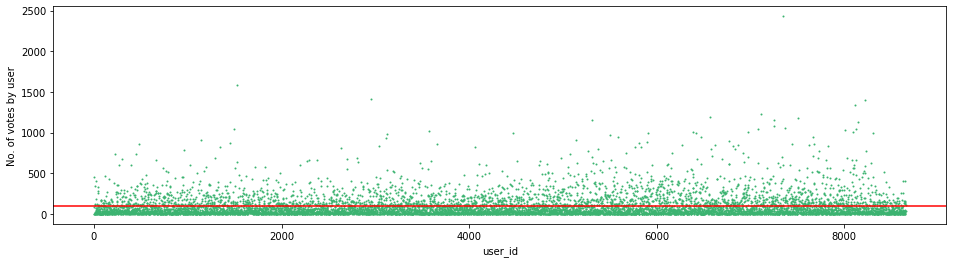

In [16]:
# qualified user_id with more than X rating count
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen', s=1)
plt.axhline(y=100,color='r')
plt.xlabel('user_id')
plt.ylabel('No. of votes by user')
plt.show()

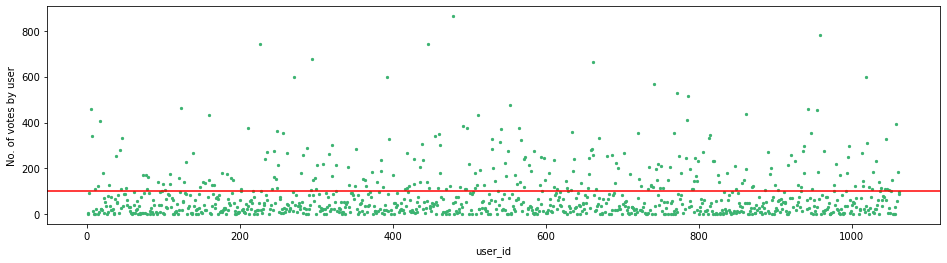

In [17]:
# qualified user_id with more than X rating count (zoom-in)
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted[:1000].index,no_movies_voted[:1000],color='mediumseagreen', s=5)
plt.axhline(y=100,color='r')
plt.xlabel('user_id')
plt.ylabel('No. of votes by user')
plt.show()

# Step 3: Data Preprocessing

In [18]:
df_rating.head()

,user_id,anime_id,rating
0,1,20.0,-1.0
1,1,24.0,-1.0
2,1,79.0,-1.0
3,1,226.0,-1.0
4,1,241.0,-1.0


In [19]:
df_rating_2 = df_rating[df_rating["rating"]!=-1]
df_rating_2

,user_id,anime_id,rating
47,1,8074.0,10.0
81,1,11617.0,10.0
83,1,11757.0,10.0
101,1,15451.0,10.0
153,2,11771.0,10.0
...,...,...,...
950485,8655,1453.0,10.0
950486,8655,1525.0,10.0
950487,8655,1526.0,7.0
950488,8655,1527.0,10.0


In [20]:
# select qualified movie id
anime_rating_count = df_rating_2.groupby(by='anime_id').count()['rating'].reset_index().rename(columns={'rating':'rating_count'})
anime_rating_count.head()

,anime_id,rating_count
0,1.0,1762
1,5.0,820
2,6.0,1218
3,7.0,302
4,8.0,44


In [21]:
# select qualified user_id
user_rating_count = df_rating_2.groupby(by='user_id').count()['rating'].reset_index().rename(columns={'rating':'rating_count'})
user_rating_count.head()

,user_id,rating_count
0,1,4
1,2,1
2,3,92
3,5,459
4,7,343


In [22]:
filtered_anime = anime_rating_count[anime_rating_count['rating_count']>250]
filtered_user = user_rating_count[user_rating_count['rating_count']>100]

In [24]:
# filter-out some data in the `df_rating`
filtered_rating_anime = df_rating_2[df_rating_2['anime_id'].isin(filtered_anime['anime_id'])]
filtered_rating = filtered_rating_anime[filtered_rating_anime['user_id'].isin(filtered_user['user_id'])]

In [25]:
# matrix for training
rating_matrix = filtered_rating.pivot_table(index='user_id',columns='anime_id',values='rating')
rating_matrix

anime_id,1.0,5.0,6.0,7.0,15.0,16.0,19.0,20.0,22.0,24.0,...,31404.0,31442.0,31478.0,31637.0,31798.0,31859.0,31964.0,32182.0,32282.0,32542.0
user_id,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,8.0,NaN,6.0,NaN,NaN,6.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,7.0,5.0,NaN,7.0,NaN,7.0,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,7.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,6.0,NaN,8.0,9.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8652,NaN,NaN,NaN,NaN,NaN,8.0,NaN,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN


In [26]:
# matrix for storing watched movies
filtered_rating_anime_2 = df_rating[df_rating['anime_id'].isin(filtered_anime['anime_id'])]
filtered_rating_2 = filtered_rating_anime_2[filtered_rating_anime_2['user_id'].isin(filtered_user['user_id'])]
rating_matrix_watched = filtered_rating_2.pivot_table(index='user_id',columns='anime_id',values='rating')
rating_matrix_watched = rating_matrix_watched.notnull().astype('int')
rating_matrix_watched

anime_id,1.0,5.0,6.0,7.0,15.0,16.0,19.0,20.0,22.0,24.0,...,31404.0,31442.0,31478.0,31637.0,31798.0,31859.0,31964.0,32182.0,32282.0,32542.0
user_id,,,,,,,,,,,,,,,,,,,,,
5,0,0,1,0,1,0,0,1,1,1,...,0,0,0,0,0,0,1,1,0,0
7,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1,0,1,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8647,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8652,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
